In [ ]:
flag = 1 # flag to skip the long interpolation (0, off | 1, on)

# 1

Every point on this homework must be solved with python code. You will show your code, your results, and make a clear statement of what is you answer. Answer **all** the questions.
1. You will be applying a transformation on a set of points of the following image (18%).
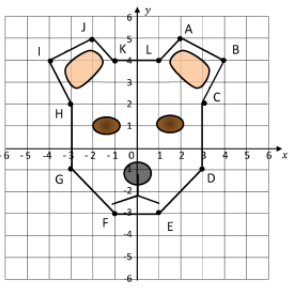
<br>
a) [2%] Find the matrix that represents a rotation of 20 degrees in homogeneous coordinates.<br>
b) [2%] Find the matrix  that represents a translation of 2 in X direction, 1 in y direction degrees in homogeneous coordinates.<br>
c) [2%] Plot the points that form the figure in the cartesian plane.<br>
d) [2%] Perform a rotation of 20 degrees on the points and plot them. <br>
e) [2%] Perform a translation  in x of 2 and a translation in y of 1 over the points previously rotated. Plot the new obtained points.<br>
f) [2%] Find a transform that represents the operation of rotation of 20 degrees followed by a translation. Compare with the points on e) and verify with a plot the match.<br>
g) [2%] Defines a matrix that represents a translation of 2 in x and a translation of 1 in y, followed by a rotation of 20 degrees. Do the transformation over the initial set of points and compare them.<br> 
h) [2%] Are the matrices obtained in g) and f) the same? Why? Justify your answer.<br>
i) [2%] Compute the inverse matrix of the transformation obtained in g). Apply such transformation over the set of points obtained in g). Do the new points match the original points? show plots to verify it.<br>



## Imports

In [ ]:
#import needed libraries
import numpy as np
import matplotlib.pyplot as plt

## Basic Definitions

In [ ]:
thetadeg = 20

#convert to radians
theta=np.pi*thetadeg /180
tx=2
ty=1

# define your points as homogeneuos coordinates (3 coordinates).
points = np.array([[2,5,1],[4,4,1],[3,2,1],[3,-1,1],[1,-3,1],[-1,-3,1],[-3,-1,1],[-3,2,1],[-4,4,1],[-2,5,1],[-1,4,1],[1,4,1]])

# Make the points be in columns (you need to transpose them)
points = np.transpose(points)

## A

In [ ]:
# A
# define your rotation matrix here:
Rr= np.array([
      [np.cos(theta), -np.sin(theta), 0],
      [np.sin(theta),  np.cos(theta), 0],
      [0,              0,             1]
    ])

## B

In [ ]:
# B
# define your translation matrix here:
Rt = np.array([
      [1, 0, tx],
      [0, 1, ty],
      [0, 0, 1]
    ])

## C / D

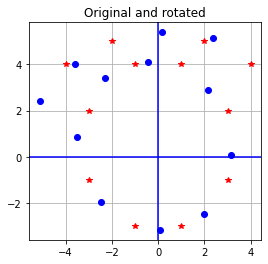

In [ ]:
# C
# set up your plot
fig, ax = plt.subplots(1)
ax.clear()
ax.grid(True)
ax.set_aspect('equal')
ax.axhline(0, color='blue')   #draw x axis
ax.axvline(0, color='blue')   #draw y axis

# Plot original points to see everything looks correct
ax.plot(points[0,:],points[1,:],'r*')


# D
# do the roation
rotPoints = np.matmul(Rr, points) 
plt.plot(rotPoints[0,:],rotPoints[1,:],'bo')
plt.title('Original and rotated')
plt.show()

## E / F

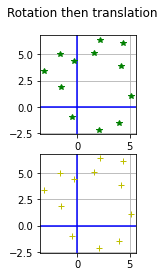



E == F



In [ ]:
# translation + rotation
fig, ax = plt.subplots(2)
fig.suptitle('Rotation then translation')
#subplot 1
ax[0].clear()
ax[0].grid(True)
ax[0].axhline(0, color='blue')
ax[0].axvline(0, color='blue')
ax[0].set_aspect('equal')
#subplot 2
ax[1].clear()
ax[1].grid(True)
ax[1].axhline(0, color='blue')
ax[1].axvline(0, color='blue')
ax[1].set_aspect('equal')


# E
# Compute translation over your rotated points
tRotPoints = np.matmul(Rt, rotPoints)
ax[0].plot(tRotPoints[0,:],tRotPoints[1,:],'g*')


# F
# compute your rotation and translation matrix
tR = np.matmul(Rt, Rr)
# Transform your points
tRotPoints3 = np.matmul(tR, points)

#plot points
ax[1].plot(tRotPoints3[0,:],tRotPoints3[1,:],'y+')
plt.show()

# make sure E and F are the same
print('\n')
if np.array_equal(tRotPoints, tRotPoints3):
  print('E == F\n')
else: 
  print('E != F\n')

## G

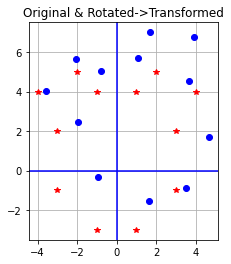

In [ ]:
# G
rtMatrix = np.matmul(Rr, Rt)
rtPoints = np.matmul(rtMatrix, points)

fig, ax = plt.subplots(1)
ax.clear()
ax.grid(True)
ax.set_aspect('equal')
ax.axhline(0, color='blue')   #draw x axis
ax.axvline(0, color='blue')   #draw y axis

ax.plot(points[0,:],points[1,:],'r*') # Original

plt.plot(rtPoints[0,:],rtPoints[1,:],'bo') # New
plt.title('Original & Rotated->Transformed')
plt.show()

## H

They are not the same. in matrix multiplication order matters b/c it's not commutative to be commutative they need to be identical square matrices/diagonal matrices

In [ ]:
# H
# check if they're the same
print('\n')
if np.array_equal(tRotPoints3, rtPoints):
  print('F == G\n')
else:
  print('F != G\n')



F != G



## I

They do match! This makes sense because the points obtained in G are aquired by applying a mtrix that rotates and transforms the points. Taking the inverse of the matrix and applying it the the rotated/transformed points should cancel out the effect.

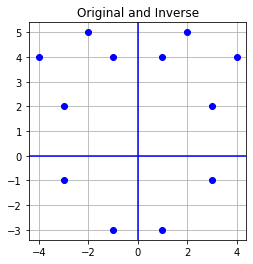

In [ ]:
# I 

# i) [2%] Compute the inverse matrix of the transformation obtained in g). 
# Apply such transformation over the set of points obtained in g). 
# Do the new points match the original points? show plots to verify it.

# Matrix/Points from G
# rtMatrix = np.matmul(Rr, Rt)
# rtPoints = np.matmul(rtMatrix, points)

rtMatrix_inv = np.linalg.inv(rtMatrix)
rtPoints_inv = np.matmul(rtMatrix_inv, rtPoints)


fig, ax = plt.subplots(1)
ax.clear()
ax.grid(True)
ax.set_aspect('equal')
ax.axhline(0, color='blue')
ax.axvline(0, color='blue')

ax.plot(points[0,:],points[1,:],'r*') # original points
plt.plot(rtPoints_inv[0,:],rtPoints_inv[1,:],'bo') # inverse G points

plt.title('Original and Inverse')
plt.show()

# 2


2. In this point you will be doing forward warping of an image and will be implementing a nearest neighbor interpolation on the following image. (Available [here](http://www.cs.ucf.edu/~gvaca/teaching/CAP4453-Fall2021/homeworks/hw5/) )<br>
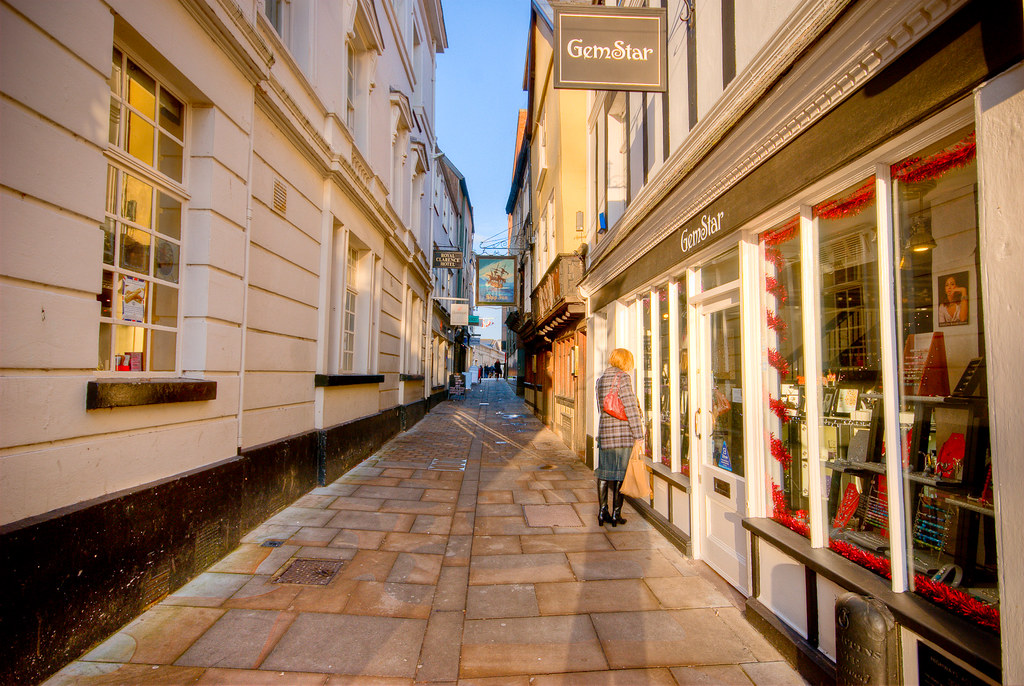
a) [10%] Implement forward warping of the grid points for the homography matrix: <br>
H=[[-2.90978069e+00,  3.54859237e-02,  1.70029144e+03],<br>
  [-6.48857919e-01, -8.36844934e-01,  6.24249500e+02],<br>
 [-2.10617311e-03,  8.27414761e-06,  1.00000000e+00]]<br>
 <br> 
 b) [2%]Visualize the obtained warped image in the range from 0 to 1000 in x and y.<br>
 c) [2%]comment about the appereance of the image. Does the image have gaps?<br>
 d) [5%] How the warping looks in regions where outside the [0-1000 pixels in x,y]<br>
 e) [10%] Implement a forward  nearest neighbor interpolation in the warped image<br>
 f) [3%]Visualize the interpolated image. <br>
 g) [2%] comment about the appereance of the interpolated image versus the initially warped image.



## Imports

In [ ]:
from skimage import io

## Base

In [ ]:
# load an image to warp

# in local machine
import cv2 as cv
#img = cv2.imread('C:/Users/gonza/OneDrive/Teaching/CAP4453/homeworksolutions/img2warp.jpg')

In [ ]:
# image available at: http://www.cs.ucf.edu/~gvaca/teaching/CAP4453-Fall2021/homeworks/hw5/
url = 'http://www.cs.ucf.edu/~gvaca/teaching/CAP4453-Fall2021/homeworks/hw5/img2warp.jpg'
img = io.imread(url)

# the values that can take y
i = np.linspace(0, img.shape[0]-1, img.shape[0]).astype(int)
# the values that can take x
j = np.linspace(0, img.shape[1]-1, img.shape[1]).astype(int)
# combination of values that can take x, and y in a grid
yv, xv = np.meshgrid(i, j)

# nimber of points on the grid
numpoints = xv.ravel().shape[0]

# extract the color channels
r = img[yv.ravel(),xv.ravel(),0]
g = img[yv.ravel(),xv.ravel(),1]
b = img[yv.ravel(),xv.ravel(),2]

## A

In [ ]:
# A
# Define Homography matrix 
H=np.array([[-2.90978069e+00,  3.54859237e-02,  1.70029144e+03],
 [-6.48857919e-01, -8.36844934e-01,  6.24249500e+02],
 [-2.10617311e-03,  8.27414761e-06,  1.00000000e+00]]
)

# all the values of x coordinates as a row
x_cord = xv.ravel().reshape((1,numpoints))
# all the values of y coordinates as a row
y_cord = yv.ravel().reshape((1,numpoints))

# define the homogeneous coordinates
grid = np.concatenate((x_cord, y_cord, np.ones((1,numpoints))),axis=0)

# transform the grid (your canvas) in the new coordinated determined by the homography defined below
newgrid = np.matmul(H, grid) ###TODO

# Convert from homogeneous to heterogeneous coordinates
newgridHetero = newgrid[:2,:]   # the x, and y

# thethirdcoordinate
w = newgrid[2,:]

# complete the conversion. remember x=X/w
newgridHetero[0,:] /= w ###TODO
newgridHetero[1,:] /= w ###TODO

# define your new empty canvas (it will have -1 if is not defined)
warped = -np.ones((1001,1001,3)).astype(np.int16)

# Raw approximation. Considering just the integer values 
newgrid2= newgridHetero.round().astype(np.int64)

# only consider points that are in your area of interest (0 to 1000)
validsX= np.bitwise_and(newgrid2[0,:]>=0,newgrid2[0,:]<1000)
validsY= np.bitwise_and(newgrid2[1,:]>=0,newgrid2[1,:]<1000)
valids = np.bitwise_and(validsX,validsY)

# assign color to the pixels that are valids
warped[newgrid2[1,valids],newgrid2[0,valids],0]=r[valids]
warped[newgrid2[1,valids],newgrid2[0,valids],1]=g[valids]
warped[newgrid2[1,valids],newgrid2[0,valids],2]=b[valids]

## B

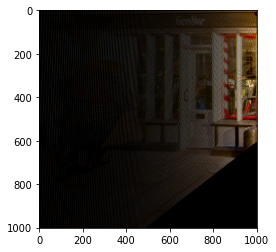

In [ ]:
plt.imshow(warped)
plt.show()

## C

The image appears a little too dark on the 0-300 axis, there's a lot of aliasing throughout, and a triangular gap in the bottom right part of the image. The architecture in general look pretty good, however the person in the image definitely looks stretched out.

## D

To the right of the image is completely black, however the upper and lower bounds continue at an angle for a while. 

After some additional adjustments with the values, I noticed that the image actually continues to be displayed to the right. What was originally on the left side is now on the right. Both sides of the image appear to have a trapezoidic shape. 

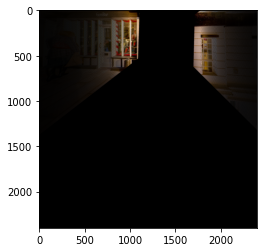

In [ ]:
# code to visualize outter bounds

warped_ = -np.ones((2400,2400,3)).astype(np.int16)
newgrid2= newgridHetero.round().astype(np.int64)

validsX= np.bitwise_and(newgrid2[0,:]>=0,newgrid2[0,:]<2400)
validsY= np.bitwise_and(newgrid2[1,:]>=0,newgrid2[1,:]<2400)
valids = np.bitwise_and(validsX,validsY)

warped_[newgrid2[1,valids],newgrid2[0,valids],0]=r[valids]
warped_[newgrid2[1,valids],newgrid2[0,valids],1]=g[valids]
warped_[newgrid2[1,valids],newgrid2[0,valids],2]=b[valids]

plt.imshow(warped_)
plt.show()

## E

In [ ]:
# nearest Neighbor interpolation
def nni(input, dimx, dimy):
    # your new canvas

    __ret = np.zeros((dimx,dimy,3)).astype(np.uint8)
    __input = input.copy()

    # Area where we look for closest valid assignation
    area2check=5

    if flag == 1:
        # loop over the valid area of the warped image
        for i in range(area2check,__input.shape[0]-area2check):
            for j in range(area2check,__input.shape[1]-area2check):
                # check if the pixel has a valid warped value        
                if __input[i,j,0]==-1:  #need to look for neighbor
                    distance = area2check*area2check+1  # assign a distance larger than any that can be found in the area to check

                    # loop over all the possible neighbors
                    for k in range(i-area2check,i+area2check):
                        for l in range(j-area2check,j+area2check):
                            distancetested = (abs(k-i)+abs(l-j))  # L1 distance
                            if __input[k,l,0]>=0 and distancetested<distance:    # found a warped point , and it is closest
                                distance=distancetested
                                __ret[i,j]=__input[k,l]
                else:  #assign the valid warping
                    __ret[i,j] = __input[i,j]

    return __ret, __input


warped2, warped = nni(warped, 1001, 1001)

## F

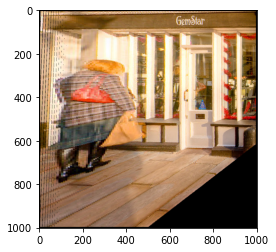

In [ ]:
plt.imshow(warped2)
plt.show()

## G

The interpolated image removed most of the aliasing in the image, however visual aberrations are now more apparent. Regardless, the darkening on the left side of the original image is not gone, edges look sharper, and the colors are more rich overall. 

# 3

3 . Write a function of the form (10%):

> imwarped = warpImage(im,H,limit_coordinates)

where im is the input image to be warped, H is the homography, and limit_coordinates defines the limits (xmin,xmax,ymin,ymax) of the warped image.  


## Function


In [ ]:
def rebalance_image(im):
  __im = im.copy()
  __im[__im<0] = 0
  __im[__im>255] = 255

  # im = (np.rint(im)).astype(int)
  
  return __im

In [ ]:
def warpImage(im,H,limit_coordinates):

  __im = im.copy()
  __H = H.copy()

  (__xmin, __xmax, __ymin, __ymax) = limit_coordinates

  __i = np.linspace(
      0, 
      __im.shape[0]-1, 
      __im.shape[0]
  ).astype(int)
  
  __j = np.linspace(
      0, 
      __im.shape[1]-1, 
      __im.shape[1]
  ).astype(int)
  
  __yv, __xv = np.meshgrid(__i, __j)

  __numpoints = __xv.ravel().shape[0]

  __r = __im[__yv.ravel(),__xv.ravel(),0]
  __g = __im[__yv.ravel(),__xv.ravel(),1]
  __b = __im[__yv.ravel(),__xv.ravel(),2]

  __x_cord = __xv.ravel().reshape((1,__numpoints))
  __y_cord = __yv.ravel().reshape((1,__numpoints))

  __grid = np.concatenate(
      (
          __x_cord, 
          __y_cord, 
          np.ones((1,__numpoints))
      ),
      axis=0
  )

  __newgrid = np.matmul(__H, __grid)

  __newgridHetero = __newgrid[:2,:]

  __w = __newgrid[2,:]
  __newgridHetero[0,:] /= __w
  __newgridHetero[1,:] /= __w

  __warped = -np.ones((__xmax,__ymax,3)).astype(np.int16)

  __newgrid2= __newgridHetero.round().astype(np.int64)

  __validsX= np.bitwise_and(
      __newgrid2[0,:]>=__xmin,
      __newgrid2[0,:]<__xmax
  )
  
  __validsY= np.bitwise_and(
      __newgrid2[1,:]>=__ymin,
      __newgrid2[1,:]<__ymax
  )
  
  __valids = np.bitwise_and(
      __validsX,
      __validsY
  )

  __warped[__newgrid2[1,__valids],__newgrid2[0,__valids],0]=r[__valids]
  __warped[__newgrid2[1,__valids],__newgrid2[0,__valids],1]=g[__valids]
  __warped[__newgrid2[1,__valids],__newgrid2[0,__valids],2]=b[__valids]

  return __warped

## Test

In [ ]:
url = 'http://www.cs.ucf.edu/~gvaca/teaching/CAP4453-Fall2021/homeworks/hw5/img2warp.jpg'
img = io.imread(url)

H=np.array([[-2.90978069e+00,  3.54859237e-02,  1.70029144e+03],
 [-6.48857919e-01, -8.36844934e-01,  6.24249500e+02],
 [-2.10617311e-03,  8.27414761e-06,  1.00000000e+00]]
)

In [ ]:
imwarped = warpImage(img, H, (0, 1001, 0, 1001))

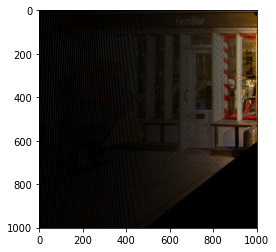

In [ ]:
plt.imshow(imwarped)
plt.show()

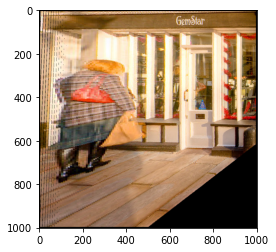

In [ ]:
imwarped_nni, imwarped = nni(imwarped, 1001, 1001)
plt.imshow(imwarped_nni)
plt.show()

# 4

<br>

4 . **Recover Homographies (10%)**.  Before you can warp your images into alignment, you need to recover the parameters of the transformation between each pair of images.  
In our case, the transformation is a homography: $p’=Hp$, 
where:
* $(p’,p)$ are pairs of corresponding points taken from the two images.  
* $H$ is a 3x3 matrix with 8 degrees of freedom (lower right corner is a scaling factor and can be set to 1;  $h_{2,2}  = 1$). <br>

Considering the matrix form below, <b>obtain an expression of the form $Ax=b$ if $h_{22} =1$ </b><br>

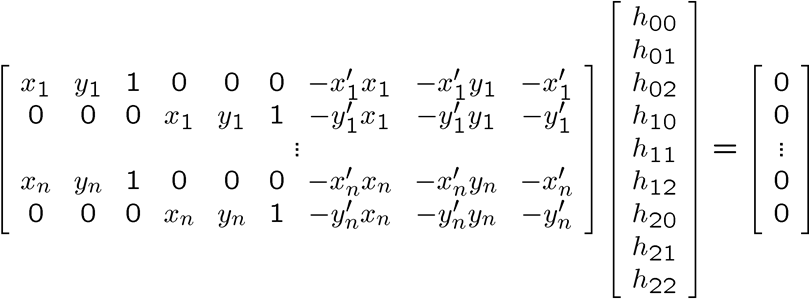
<br>
<b>Tip: if $h_{2,2}$ is 1, you can have 1 parameter less in the h vector and 1 column less in the matrix; b will not be zero anymore</b>
<br>
<br>




###Answer

To create the expression first do matrix multiplication to A and h.<br>
<br>Result:<br>
<br>x1\*h00 + y1\*h01 + 1\*h02 + 0\*h10 + 0\*h11 + 0\*h12 - x'1\*x1\*h20 - x'1\*y1\*h21 - x'1\*h22 = 0
<br>0\*h00 + 0\*h01  + 0\*h02 + x1\*h10 + y1\*h11 + 1\*h12 - y'1\*x1\*h20 - y'1\*y1\*h21 - y'1\*h22 = 0
<br>xn\*h00 + yn\*h01 + 1\*h02 + 0\*h10 + 0\*h11 + 0\*h12 - x'1\*x1\*h20 - x'1\*y1\*h21 - x'n\*h22 = 0
<br>0\*h00  + 0\*h01  + 0\*h02 + xn\*h10 + yn\*h11 + 1\*h12 - y'n\*xn\*h20 - y'n\*yn\*h21 - y'n\*h22 = 0

<br>Since h22 == 1, we can change all instances in the previous set of equations to be 1. This will leave the effected variables as "constants".

<br>x1\*h00 + y1\*h01 + 1\*h02 + 0\*h10 + 0\*h11 + 0\*h12 - x'1\*x1\*h20 - x'1\*y1\*h21 - x'1 = 0
<br>0\*h00 + 0\*h01  + 0\*h02 + x1\*h10 + y1\*h11 + 1\*h12 - y'1\*x1\*h20 - y'1\*y1\*h21 - y'1 = 0
<br>xn\*h00 + yn\*h01 + 1\*h02 + 0\*h10 + 0\*h11 + 0\*h12 - x'1\*x1\*h20 - x'1\*y1\*h21 - x'n = 0
<br>0\*h00  + 0\*h01  + 0\*h02 + xn\*h10 + yn\*h11 + 1\*h12 - y'n\*xn\*h20 - y'n\*yn\*h21 - y'n = 0

<br>Because they are now constants and are no longer effected by the "h" matrix, they can just be moved to the other side!

<br>x1\*h00 + y1\*h01 + 1\*h02 + 0\*h10 + 0\*h11 + 0\*h12 - x'1\*x1\*h20 - x'1\*y1\*h21 = x'1 
<br>0\*h00 + 0\*h01  + 0\*h02 + x1\*h10 + y1\*h11 + 1\*h12 - y'1\*x1\*h20 - y'1\*y1\*h21 = y'1 
<br>xn\*h00 + yn\*h01 + 1\*h02 + 0\*h10 + 0\*h11 + 0\*h12 - x'1\*x1\*h20 - x'1\*y1\*h21 = x'n 
<br>0\*h00  + 0\*h01  + 0\*h02 + xn\*h10 + yn\*h11 + 1\*h12 - y'n\*xn\*h20 - y'n\*yn\*h21 = y'n

<br>Now we can convert this back to individual matrices:<br>
$$
\left(\begin{array}{cc} 
x1 & y1 & 1 & 0 & 0 & 0 & -x1'*x1 & -x1'y1\\
0 & 0 & 0 & x1 & y1 & 1 & -y1'*x1 & -y1'y1\\
...\\
xn & yn & 1 & 0 & 0 & 0 & -xn'*xn & -xn'yn\\
0 & 0 & 0 & xn & yn & 1 & -yn'*xn & -yn'yn\\
\end{array}\right)
\left(\begin{array}{cc} 
h00\\
h01\\
h02\\
h10\\
h11\\
h12\\
h20\\
h21
\end{array}\right)
=
\left(\begin{array}{cc} 
x'1\\
y'1\\
...
x'n\\
y'n
\end{array}\right)
$$

###Code

In [ ]:
def T (x):
  return np.transpose(x)

In [ ]:
def problem4 (A): 

  # current form: Ah=0
  # assume h22 = 1

  b = -A[:,-1] # new b matrix with last column of A
  A = np.delete(A, -1, -1) # remove last column of A

  # current form: Ax=b 
  
  return A,b

# 5

5 . Write a python function using the expression obtained in the previous point with the following prototype (10%): <br>

> H = computeH(im1_pts,im2_pts) <br>

where im1_pts and im2_pts are n-by-2 matrices holding the (x,y) locations of n point correspondences from the two images and H is the recovered 3x3 homography matrix.  

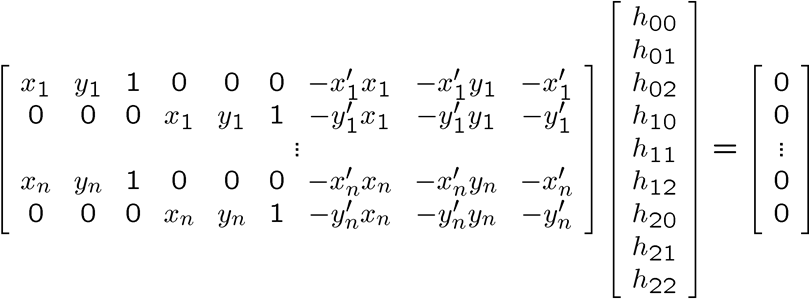
<br>

In [ ]:
def generate_A (p1, p2, n):
  
  a = __chunk_1(p1, n) # First nx3 part of the A matrix
  b = __chunk_2(p1, n) # Second nx3 part of the A matrix
  c = __chunk_3(p1, p2, n) # Third nx3 part of the A matrix

  A = T(np.concatenate((T(a),T(b)))) # Combine part 1 and part 2 
  A = T(np.concatenate((T(A),T(c)))) # Combine part(1,2) and part 3

  return A

def __chunk_1 (P, n):
  a=np.zeros((n*2, 2))  # create an array of zeros
  a[::2] = P # append points to every other row (nx2)

  a_0 = np.zeros((n*2, 1)) # create array of zeros
  a_0[::2] = np.ones((n, 1))  # append ones to every other row (nx1)

  a = T(np.concatenate((T(a), T(a_0)))) # resulting nx3

  return a

def __chunk_2 (P, n): # same as __chunk_1(..) but with an additional zero row on top
  b = np.zeros((n*2+1, 2)) 
  b[::2] = np.append([[0,0]], P, axis=0)
  b = np.delete(b, 1, 0)

  b_0 = np.zeros((n*2+1, 1)) 
  b_0[::2] = np.ones((n+1, 1)) 
  b_0 = np.delete(b_0, 0, 0) # remove extra zero row

  b = T(np.concatenate((T(b), T(b_0))))

  return b

def __chunk_3 (p1, p2, n):
  c = np.array([[0,0,0]]) # init

  for i in range(0, n):
    tmp_= np.array([
      [-p2[i][0] * p1[i][0], # -x'n * xn
       -p2[i][0] * p1[i][1], # -x'n * yn
       -p2[i][0]]            # -x'n
      ])
    tmp__ = np.array([
      [-p2[i][1] * p1[i][0], # -y'n * xn
       -p2[i][1] * p1[i][1], # -y'n * yn
       -p2[i][1]]            # -y'n
      ])
    c_ = np.append(tmp_, tmp__, axis=0) # append two halves
    c = np.append(c, c_, axis=0) # append combined halves to return matrix

  c = np.delete(c, 0, 0) # remove init

  return c

In [ ]:
def Ab_to_H(A,b):
  H = np.matmul(
      np.linalg.inv((np.matmul(T(A), A))),
      np.matmul(T(A), b)
  ) # TODO

  H = np.append(H, [[1]]).reshape(3,3) # need a 1 in the bottom right corner!

  return H

In [ ]:
# given two images, use the Ax=b thing
def computeH(im1_pts, im2_pts):

  n = im1_pts.shape[0] 

  A = generate_A(im1_pts, im2_pts, n) # original A matrix

  A,b = problem4(A)

  H = Ab_to_H(A,b)

  return H

# 6

6 . Test your functions. Select 4 points manually from the image in point 2. The cooresponding points will be your corner points in the new warped image (origin, top right, bottom right, bottom left). <br>
a) Compute a new homography matrix using function created in 5. (10%).<br>
b) Visualize the warped image using the function created in 3. (8%).<br>

## Test Validity of Function

In [ ]:
pts_src = np.array([[141, 131], [480, 159], [493, 630], [64, 601]])
pts_dst = np.array([[318, 256], [534, 372], [316, 670], [73, 473]])

In [ ]:
H = computeH(pts_src, pts_dst) # mine
H

array([[ 4.34043935e-01, -4.19622184e-01,  2.91709494e+02],
       [ 1.46491654e-01,  4.41418278e-01,  1.61369294e+02],
       [-3.62463336e-04, -9.14274844e-05,  1.00000000e+00]])

In [ ]:
h, status = cv.findHomography(pts_src, pts_dst) # opencv
h

array([[ 4.34043935e-01, -4.19622184e-01,  2.91709494e+02],
       [ 1.46491654e-01,  4.41418278e-01,  1.61369294e+02],
       [-3.62463336e-04, -9.14274844e-05,  1.00000000e+00]])

In [ ]:
d = 8 # round to 8 decimals
H.round(decimals=d) == h.round(decimals=d)

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

## Precursor

In [ ]:
# Select 4 points manually from the image in point 2. 
# The cooresponding points will be your corner points in the new warped image 
# (origin, top right, bottom right, bottom left).
dimx, dimy = 1024 -1, 686 -1
pts_src = np.array([[644,297], [891, 165], [909,591], [646,456]])
pts_dst = np.array([[0, 0], [dimx, 0], [dimx, dimy], [0, dimy]])

## A

In [ ]:
# Compute a new homography matrix using function created in 5. (10%).
H = computeH(pts_src, pts_dst)                  # mine
h, status = cv.findHomography(pts_src, pts_dst) # opencv

In [ ]:
#double check
H.round(decimals=d) == h.round(decimals=d)

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

## B

In [ ]:
# Visualize the warped image using the function created in 3. (8%).
imwarped2 = warpImage(img, H, (0, dimx, 0, dimx))

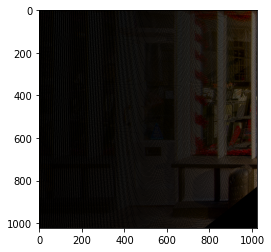

In [ ]:
plt.imshow(imwarped2)
plt.show()

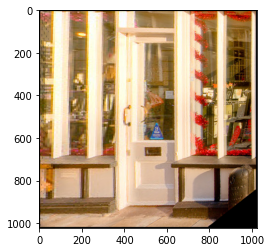

In [ ]:
imwarped3, _imwarped2 = nni(imwarped2.copy(), dimx, dimx)
plt.imshow(imwarped3)
plt.show()

# Bonus

## Question

**BONUS [50%] Stackable with other homeworks if your score overpass 100%**: 
Write a function of the form:

Use the method described in class. you need forward and inverse warping (but remember that for inverse warping you will need to compute H in the right “direction”). 

Try to write the whole function without any loops. One thing you need to pay attention to is the size of the resulting image (you can predict the bounding box by piping the four corners of the image through H, or use extra input parameters).  Also pay attention to how you mark pixels which don’t have any values.

Utilizes bilinear interpolation to approximate non integer pixel positions.

## Answer

In [ ]:
def warpImage(im1, im2, H, limit_coordinates):

  x_min, x_max, y_min, y_max = (limit_coordinates)

  # this does the same thing as the original warpImage(...) we created earlier
  # since it is being overwritten with this new function definition we need to 
  # adjust
  im2_warped = cv.warpPerspective(
    im2, 
    H, 
    (y_max, y_max) 
  ) # old size: (x_max * 2, y_max) 

  # append the first image *ontop* of the warped second image
  im2_warped[0 : im1.shape[0], 0 : im1.shape[1]] = im1

  return im2_warped

def bilinear_interpolation(image, dimensions):
  
    return cv.resize(image, dimensions, interpolation=cv.INTER_LINEAR)

In [ ]:
# image source: https://github.com/SSARCandy/panoramas-image-stitching/tree/master/input_image/Xue-Mountain-Enterance

url1 = 'https://raw.githubusercontent.com/SSARCandy/panoramas-image-stitching/master/input_image/Xue-Mountain-Enterance/DSC_0171.jpg'
im1 = io.imread(url1)

url2 = 'https://raw.githubusercontent.com/SSARCandy/panoramas-image-stitching/master/input_image/Xue-Mountain-Enterance/DSC_0172.jpg'
im2 = io.imread(url2)

# both images have the same dimensions
dimx, dimy = 664, 1000

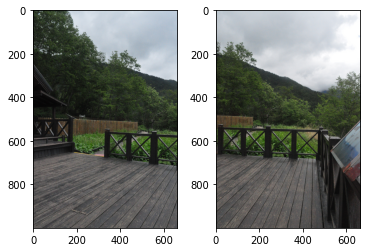

In [ ]:
# original
f, axarr = plt.subplots(1, 2)
axarr[0].imshow(im1)
axarr[1].imshow(im2)

In [ ]:
# point correspondences
p1 = np.array(
    [
    [480,514],
    [479,557],
    [495,625],
    [356,577],
    [544,569],
    [523,706],
    [340,670]
    ]
)

p2 = np.array(
    [
    [170,491],
    [169,534],
    [182,601],
    [38, 557],
    [229,544],
    [210,677],
    [22, 654]
    ]
)

In [ ]:
H_stitch_i = computeH(p2, p1) # notice p2 is first

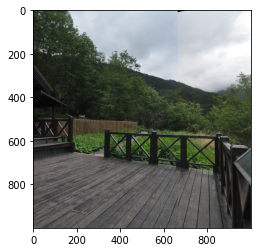

In [ ]:
bonus = warpImage(im1, im2, H_stitch_i, (0, dimx, 0, dimy))
bonus = bilinear_interpolation(bonus, (dimy, dimy))

plt.imshow(bonus)